Project proposal to predict credit card approval


Questions

Hypothesis

Approach


You will prepare a project proposal detailing the questions we are wanting to answer. The initial hypotheses about the data relationships and the approach you will take to get your answers.


Proposal is just a plan.

End goal is important


Section 1: Questions to Answer

What questions do you want to answer? 2-5


Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?  

How is it going to impact the banking sector? 

If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.


Section 2: Initial Hypothesis (or hypotheses)

Here you have to make some assumptions based on the questions you want to address based on the DA track or ML track. 

If DA track please aim to identify patterns in the data and important features that may impact a ML model.

If ML track please perform part ‘i’ as well as multiple machine learning models, perform all required steps to check if there is any assumption and justify your model. Why is your model better than any other possible model? Please justify it by relevant cost functions and if possible by any graph.

From step 1, you may see some relationship that you want to explore and will develop a belief about data


Section 3: Data analysis approach

What approach are you going to take in order to prove or disprove your hypothesis?

What feature engineering techniques will be relevant to your project?

Please justify your data analysis approach.

Identify important patterns in your data using the EDA approach to justify your findings.


Section 4: Machine learning approach

What method will you use for machine learning based predictions for credit card approval?

Please justify the most appropriate model.

Please perform necessary steps required to improve the accuracy of your model.

Please compare all models (at least 4  models).


Utilize machine learning approaches to predict credit card approval based on customer information.


A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.


Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.


Features name: (Credit_Card.csv)

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size


Another data set (Credit_card_label.csv) contains two key pieces of information

ID: The joining key between application data and credit status data, same is Ind_ID

Label: 0 is application approved and 1 is application rejected. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [270]:
df = pd.read_csv(r"C:\Users\thaku\Desktop\odin\Cradit card Project\Capstone+Project+1\Credit_card.csv")

# EDA

In [271]:
df.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  
0             NaN               2  
1             NaN               2  
2             NaN               2  
3             NaN               2  
4             NaN               2

In [272]:
df.shape

(1548, 18)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [274]:
df['Ind_ID'].duplicated().sum()

0

In [275]:
df.columns[1:]

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone',
       'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

In [276]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [277]:
df['GENDER'].unique()

array(['M', 'F', nan], dtype=object)

In [278]:
df['Car_Owner'].unique()

array(['Y', 'N'], dtype=object)

In [279]:
df['Propert_Owner'].unique()

array(['Y', 'N'], dtype=object)

In [280]:
df['Type_Income'].unique()

array(['Pensioner', 'Commercial associate', 'Working', 'State servant'],
      dtype=object)

In [281]:
df['EDUCATION'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [282]:
df['Marital_status'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [283]:
df['Housing_type'].unique()

array(['House / apartment', 'With parents', 'Rented apartment',
       'Municipal apartment', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [284]:
df['Mobile_phone'].value_counts()

Mobile_phone
1    1548
Name: count, dtype: int64

In [285]:
df['Work_Phone'].unique()

array([0, 1], dtype=int64)

In [286]:
df['Phone'].unique()

array([0, 1], dtype=int64)

In [287]:
df['EMAIL_ID'].unique()

array([0, 1], dtype=int64)

In [288]:
df['Type_Occupation'].value_counts(dropna=False)

Type_Occupation
NaN                      488
Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Low-skill Laborers         9
Secretaries                9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: count, dtype: int64

# Handling missing values

In [289]:
df['Type_Occupation'].fillna('not_specified',inplace=True)

In [290]:
df['Annual_income'].fillna(df['Annual_income'].median(), inplace=True)
df['Birthday_count'].fillna(df['Birthday_count'].median(), inplace=True)

# Drop rows with any remaining missing values
df.dropna(inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())


Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
dtype: int64


In [291]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [292]:
df.describe()

Ind_ID     CHILDREN  Annual_income  Birthday_count  \
count  1.541000e+03  1541.000000   1.541000e+03     1541.000000   
mean   5.078979e+06     0.413368   1.904341e+05   -16042.391304   
std    4.167137e+04     0.777811   1.121523e+05     4198.572906   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045113e+06     0.000000   1.215000e+05   -19482.000000   
50%    5.078924e+06     0.000000   1.665000e+05   -15661.500000   
75%    5.115671e+06     1.000000   2.250000e+05   -12488.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       Employed_days  Mobile_phone   Work_Phone        Phone     EMAIL_ID  \
count    1541.000000        1541.0  1541.000000  1541.000000  1541.000000   
mean    59405.890980           1.0     0.208306     0.308241     0.092148   
std    137847.216798           0.0     0.406229     0.461917     0.289329   
min    -14887.000000           1.0     0.000000     0.000000     0.000000   
25%     -3173.000000           1.0     0.000000     0.000000     0.000000   
50%     -1563.000000           1.0     0.000000     0.000000     0.000000   
75%      -431.000000           1.0     0.000000     1.000000     0.000000   
max    365243.000000           1.0     1.000000     1.000000     1.000000   

       Family_Members  
count     1541.000000  
mean         2.162232  
std          0.948492  
min          1.000000  
25%          2.000000  
50%          2.000000  
75%          3.000000  
max         15.000000

In [293]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

count          mean            std        min         1%  \
Ind_ID          1541.0  5.078979e+06   41671.365842  5008827.0  5009454.6   
CHILDREN        1541.0  4.133679e-01       0.777811        0.0        0.0   
Annual_income   1541.0  1.904341e+05  112152.346597    33750.0    54000.0   
Birthday_count  1541.0 -1.604239e+04    4198.572906   -24946.0   -24303.8   
Employed_days   1541.0  5.940589e+04  137847.216798   -14887.0   -11138.2   
Mobile_phone    1541.0  1.000000e+00       0.000000        1.0        1.0   
Work_Phone      1541.0  2.083063e-01       0.406229        0.0        0.0   
Phone           1541.0  3.082414e-01       0.461917        0.0        0.0   
EMAIL_ID        1541.0  9.214796e-02       0.289329        0.0        0.0   
Family_Members  1541.0  2.162232e+00       0.948492        1.0        1.0   

                       2%         3%         4%         5%        10%  \
Ind_ID          5009816.4  5010206.0  5010751.4  5018505.0  5023655.0   
CHILDREN              0.0        0.0        0.0        0.0        0.0   
Annual_income     67500.0    67500.0    72000.0    76500.0    90000.0   
Birthday_count   -23836.8   -23544.2   -23336.8   -23235.0   -22002.0   
Employed_days     -9359.8    -8278.0    -7654.4    -7310.0    -5460.0   
Mobile_phone          1.0        1.0        1.0        1.0        1.0   
Work_Phone            0.0        0.0        0.0        0.0        0.0   
Phone                 0.0        0.0        0.0        0.0        0.0   
EMAIL_ID              0.0        0.0        0.0        0.0        0.0   
Family_Members        1.0        1.0        1.0        1.0        1.0   

                      25%        50%        75%        90%        95%  \
Ind_ID          5045113.0  5078924.0  5115671.0  5140019.0  5145964.0   
CHILDREN              0.0        0.0        1.0        1.0        2.0   
Annual_income    121500.0   166500.0   225000.0   315000.0   360000.0   
Birthday_count   -19482.0   -15661.5   -12488.0   -10457.0    -9901.0   
Employed_days     -3173.0    -1563.0     -431.0   365243.0   365243.0   
Mobile_phone          1.0        1.0        1.0        1.0        1.0   
Work_Phone            0.0        0.0        0.0        1.0        1.0   
Phone                 0.0        0.0        1.0        1.0        1.0   
EMAIL_ID              0.0        0.0        0.0        0.0        1.0   
Family_Members        2.0        2.0        3.0        3.0        4.0   

                      96%        97%        98%        99%        max  
Ind_ID          5146304.8  5148565.4  5149039.2  5149625.0  5150412.0  
CHILDREN              2.0        2.0        2.0        3.0       14.0  
Annual_income    405000.0   450000.0   450000.0   567000.0  1575000.0  
Birthday_count    -9773.2    -9488.0    -9153.0    -8923.0    -7705.0  
Employed_days    365243.0   365243.0   365243.0   365243.0   365243.0  
Mobile_phone          1.0        1.0        1.0        1.0        1.0  
Work_Phone            1.0        1.0        1.0        1.0        1.0  
Phone                 1.0        1.0        1.0        1.0        1.0  
EMAIL_ID              1.0        1.0        1.0        1.0        1.0  
Family_Members        4.0        4.0        4.0        5.0       15.0

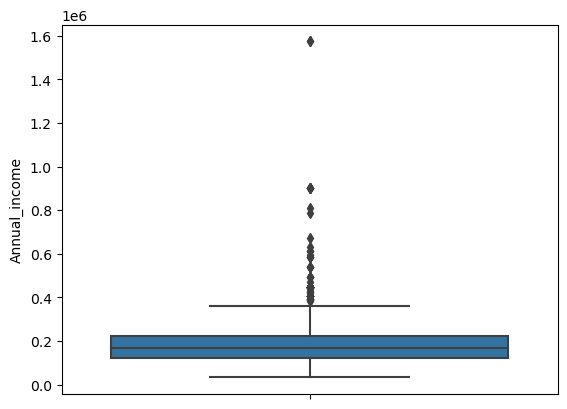

In [294]:
sns.boxplot(df,y='Annual_income')

plt.show()

<Axes: ylabel='CHILDREN'>

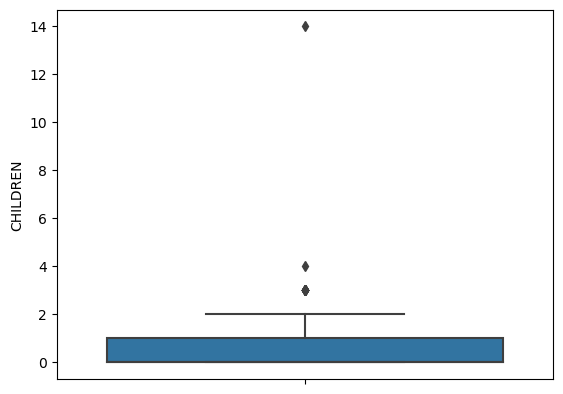

In [295]:
sns.boxplot(data=df, y=df['CHILDREN'])

In [296]:
df['Employed_days'].max()

365243

<Axes: ylabel='Birthday_count'>

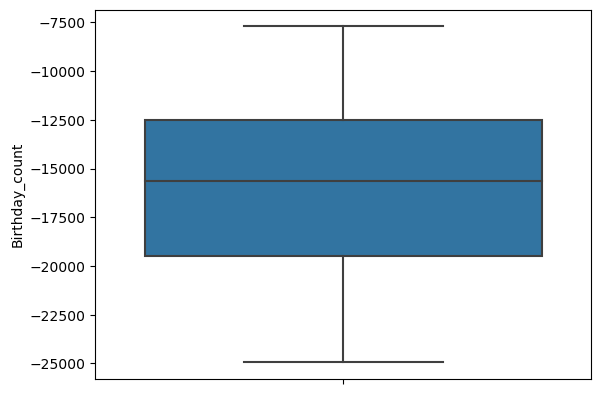

In [297]:
sns.boxplot(data=df, y=df['Birthday_count'])

In [298]:

# Convert categorical variables to numerical using one-hot encoding
#df = pd.get_dummies(df, columns=['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation'])


<Axes: ylabel='Birthday_count'>

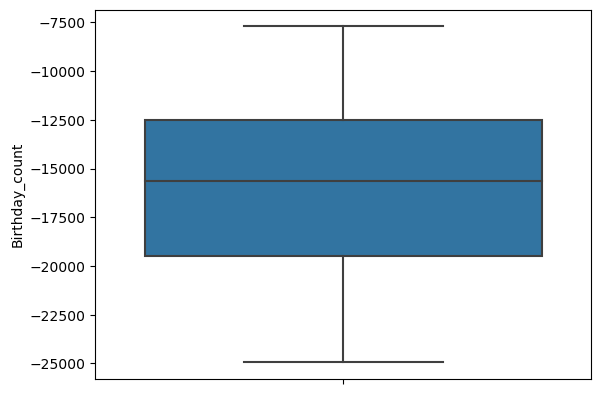

In [299]:
sns.boxplot(data=df, y=df['Birthday_count'])

<Axes: ylabel='Employed_days'>

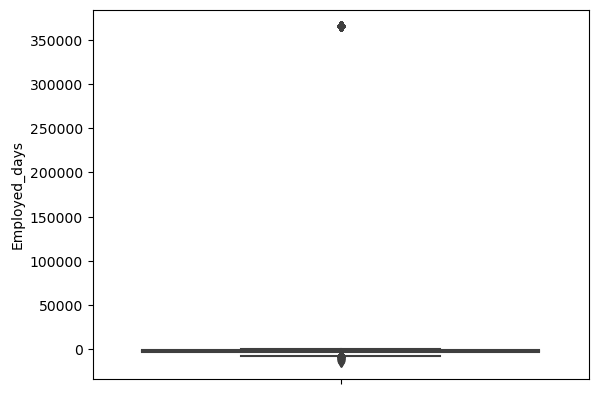

In [300]:
sns.boxplot(data=df, y=df['Employed_days'])

In [301]:
df[df['Employed_days']>=0]['Employed_days'].value_counts()

Employed_days
365243    260
Name: count, dtype: int64

In [302]:
#Convarting Birthday_count to AGE_YEARS
df['AGE_YEARS']=round(-df['Birthday_count']/365.2425,0)


In [303]:
# Create years employed feature
df['YEARS_EMPLOYED']=round(-df['Employed_days']/365.2425)
df.loc[df['YEARS_EMPLOYED']<0,'Employed_days']=0

In [304]:
df.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0       166500.0   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0              0             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2        -15661.5           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  AGE_YEARS  YEARS_EMPLOYED  
0   not_specified               2       51.0         -1000.0  
1   not_specified               2       37.0             2.0  
2   not_specified               2       43.0             2.0  
3   not_specified               2       37.0             2.0  
4   not_specified               2       37.0             2.0

In [305]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

count          mean            std        min         1%  \
Ind_ID          1541.0  5.078979e+06   41671.365842  5008827.0  5009454.6   
CHILDREN        1541.0  4.133679e-01       0.777811        0.0        0.0   
Annual_income   1541.0  1.904341e+05  112152.346597    33750.0    54000.0   
Birthday_count  1541.0 -1.604239e+04    4198.572906   -24946.0   -24303.8   
Employed_days   1541.0 -2.218496e+03    2406.312948   -14887.0   -11138.2   
Mobile_phone    1541.0  1.000000e+00       0.000000        1.0        1.0   
Work_Phone      1541.0  2.083063e-01       0.406229        0.0        0.0   
Phone           1541.0  3.082414e-01       0.461917        0.0        0.0   
EMAIL_ID        1541.0  9.214796e-02       0.289329        0.0        0.0   
Family_Members  1541.0  2.162232e+00       0.948492        1.0        1.0   
AGE_YEARS       1541.0  4.393186e+01      11.507249       21.0       24.0   
YEARS_EMPLOYED  1541.0 -1.626470e+02     377.412811    -1000.0    -1000.0   

                       2%         3%         4%         5%        10%  \
Ind_ID          5009816.4  5010206.0  5010751.4  5018505.0  5023655.0   
CHILDREN              0.0        0.0        0.0        0.0        0.0   
Annual_income     67500.0    67500.0    72000.0    76500.0    90000.0   
Birthday_count   -23836.8   -23544.2   -23336.8   -23235.0   -22002.0   
Employed_days     -9359.8    -8278.0    -7654.4    -7310.0    -5460.0   
Mobile_phone          1.0        1.0        1.0        1.0        1.0   
Work_Phone            0.0        0.0        0.0        0.0        0.0   
Phone                 0.0        0.0        0.0        0.0        0.0   
EMAIL_ID              0.0        0.0        0.0        0.0        0.0   
Family_Members        1.0        1.0        1.0        1.0        1.0   
AGE_YEARS            25.0       26.0       27.0       27.0       29.0   
YEARS_EMPLOYED    -1000.0    -1000.0    -1000.0    -1000.0    -1000.0   

                      25%        50%        75%        90%        95%  \
Ind_ID          5045113.0  5078924.0  5115671.0  5140019.0  5145964.0   
CHILDREN              0.0        0.0        1.0        1.0        2.0   
Annual_income    121500.0   166500.0   225000.0   315000.0   360000.0   
Birthday_count   -19482.0   -15661.5   -12488.0   -10457.0    -9901.0   
Employed_days     -3173.0    -1563.0     -431.0        0.0        0.0   
Mobile_phone          1.0        1.0        1.0        1.0        1.0   
Work_Phone            0.0        0.0        0.0        1.0        1.0   
Phone                 0.0        0.0        1.0        1.0        1.0   
EMAIL_ID              0.0        0.0        0.0        0.0        1.0   
Family_Members        2.0        2.0        3.0        3.0        4.0   
AGE_YEARS            34.0       43.0       53.0       60.0       64.0   
YEARS_EMPLOYED        1.0        4.0        9.0       15.0       20.0   

                      96%        97%        98%        99%        max  
Ind_ID          5146304.8  5148565.4  5149039.2  5149625.0  5150412.0  
CHILDREN              2.0        2.0        2.0        3.0       14.0  
Annual_income    405000.0   450000.0   450000.0   567000.0  1575000.0  
Birthday_count    -9773.2    -9488.0    -9153.0    -8923.0    -7705.0  
Employed_days         0.0        0.0        0.0        0.0        0.0  
Mobile_phone          1.0        1.0        1.0        1.0        1.0  
Work_Phone            1.0        1.0        1.0        1.0        1.0  
Phone                 1.0        1.0        1.0        1.0        1.0  
EMAIL_ID              1.0        1.0        1.0        1.0        1.0  
Family_Members        4.0        4.0        4.0        5.0       15.0  
AGE_YEARS            64.0       64.0       65.0       67.0       68.0  
YEARS_EMPLOYED       21.0       23.0       26.0       30.2       41.0

In [306]:
df['Ind_ID'].duplicated().sum()

0

<Axes: ylabel='Annual_income'>

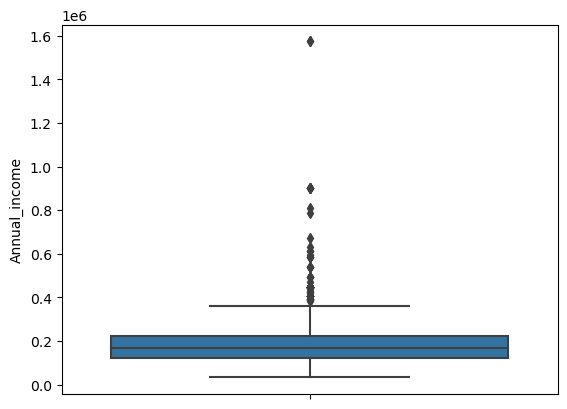

In [307]:
sns.boxplot(df,y='Annual_income')

In [256]:
# Getting data of 45k+ monthly salery 
df[df['Annual_income']>540000]

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
95    5090166      F         N             Y         1       675000.0   
150   5135990      F         N             Y         1       585000.0   
151   5135991      F         N             Y         1       585000.0   
211   5143231      F         Y             Y         1      1575000.0   
233   5143235      F         Y             Y         1      1575000.0   
242   5090470      M         N             Y         1       900000.0   
393   5088834      F         N             Y         0       612000.0   
515   5088836      F         N             Y         0       612000.0   
557   5067653      F         N             Y         0       787500.0   
573   5090701      F         N             N         0       594000.0   
587   5024352      M         Y             Y         0       585000.0   
686   5079016      M         Y             Y         2       900000.0   
811   5079017      M         Y             Y         2       900000.0   
1068  5116005      M         Y             Y         1       900000.0   
1076  5024604      F         N             Y         0       630000.0   
1355  5148669      M         Y             Y         1       810000.0   

               Type_Income                      EDUCATION  \
95    Commercial associate  Secondary / secondary special   
150   Commercial associate               Higher education   
151   Commercial associate               Higher education   
211   Commercial associate               Higher education   
233   Commercial associate               Higher education   
242                Working  Secondary / secondary special   
393          State servant  Secondary / secondary special   
515          State servant  Secondary / secondary special   
557          State servant               Higher education   
573              Pensioner               Higher education   
587   Commercial associate  Secondary / secondary special   
686   Commercial associate               Higher education   
811   Commercial associate               Higher education   
1068  Commercial associate               Higher education   
1076             Pensioner  Secondary / secondary special   
1355  Commercial associate              Incomplete higher   

            Marital_status         Housing_type  Birthday_count  \
95    Single / not married    House / apartment        -15452.0   
150   Single / not married    House / apartment        -10430.0   
151   Single / not married    House / apartment        -10430.0   
211   Single / not married    House / apartment        -10142.0   
233   Single / not married    House / apartment        -10142.0   
242                Married    House / apartment        -15380.0   
393                Married    House / apartment        -12563.0   
515                Married    House / apartment        -12563.0   
557                Married    House / apartment        -17203.0   
573   Single / not married  Municipal apartment        -17387.0   
587                Married         With parents        -16653.0   
686                Married    House / apartment         -9889.0   
811                Married    House / apartment         -9889.0   
1068        Civil marriage    House / apartment        -16923.0   
1076  Single / not married    House / apartment        -21982.0   
1355        Civil marriage     Office apartment        -17922.0   

      Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
95             -860             1           0      0         0   
150            -900             1           0      0         0   
151            -900             1           0      0         0   
211           -2479             1           0      0         0   
233           -2479             1           0      0         0   
242           -4509             1           0      0         0   
393           -3715             1           0      0         1   
515           -3715             1           0      0       

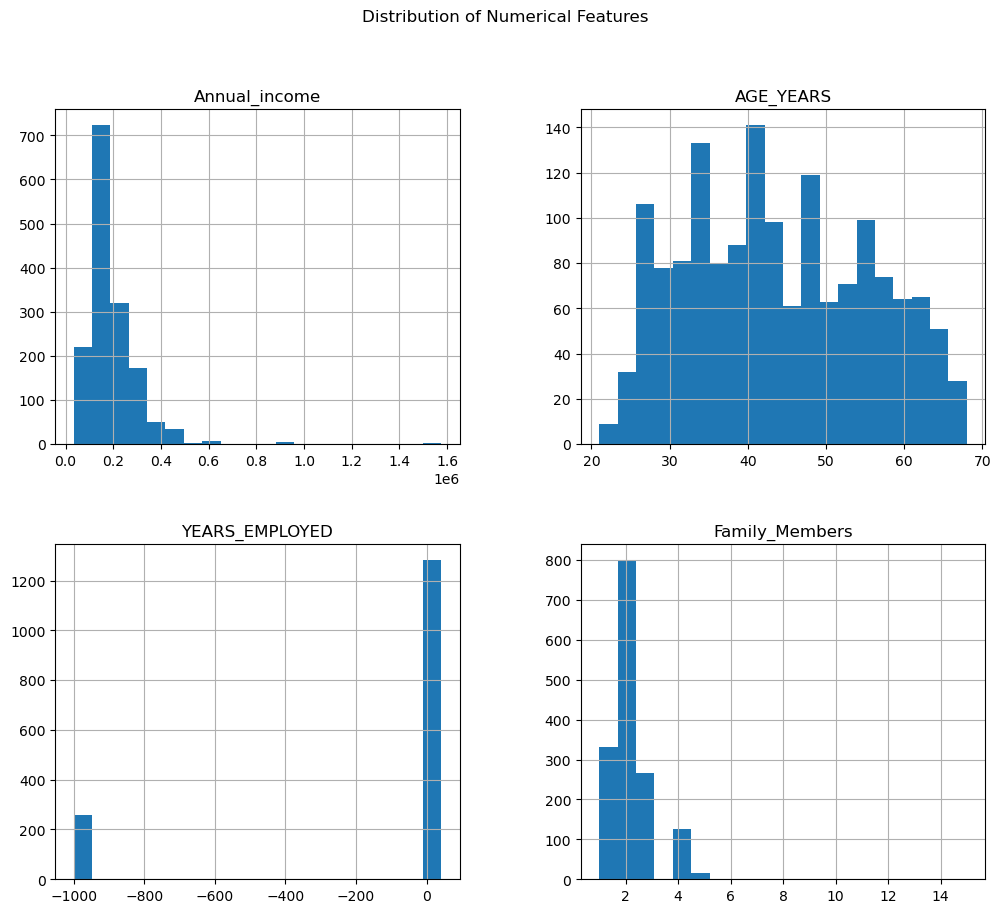

In [316]:
# Distribution of numerical features
df_numerical = df[['Annual_income', 'AGE_YEARS', 'YEARS_EMPLOYED', 'Family_Members']]
df_numerical.hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

C:\Users\thaku\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


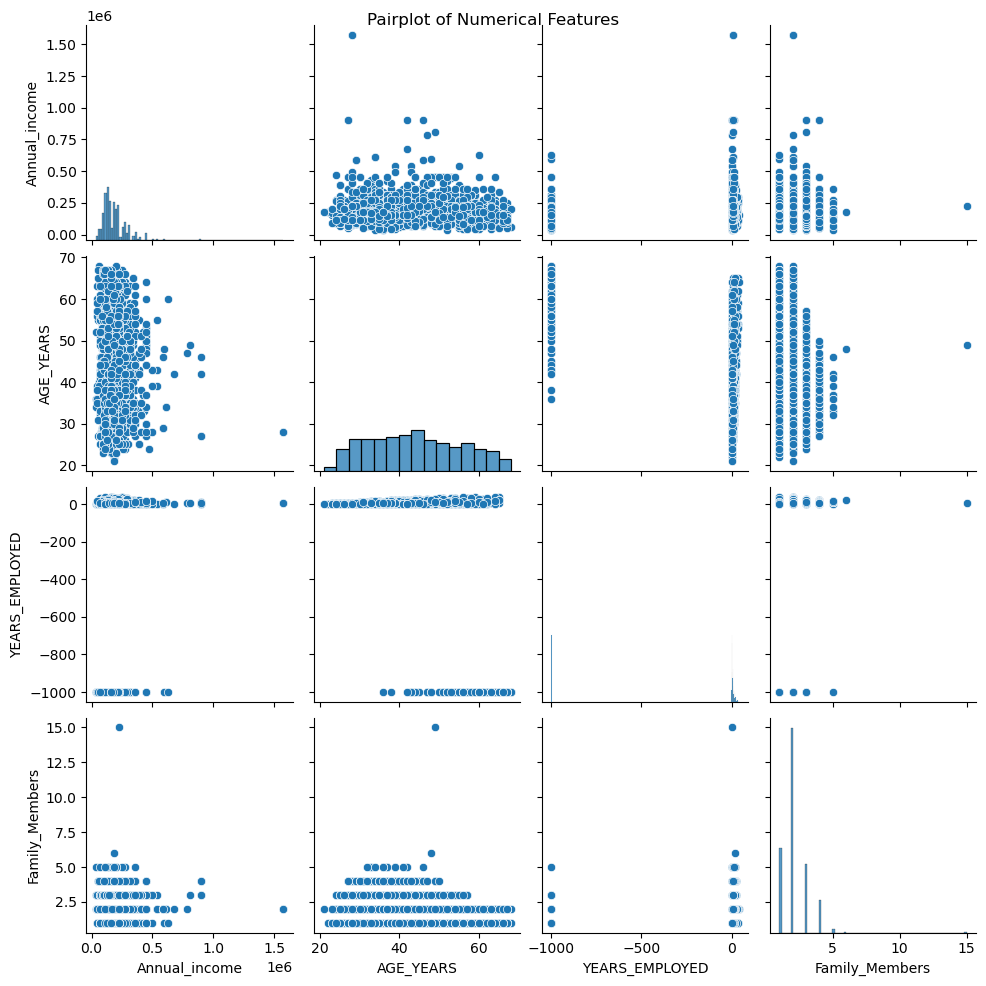

In [317]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df_numerical)
plt.suptitle('Pairplot of Numerical Features')
plt.show()

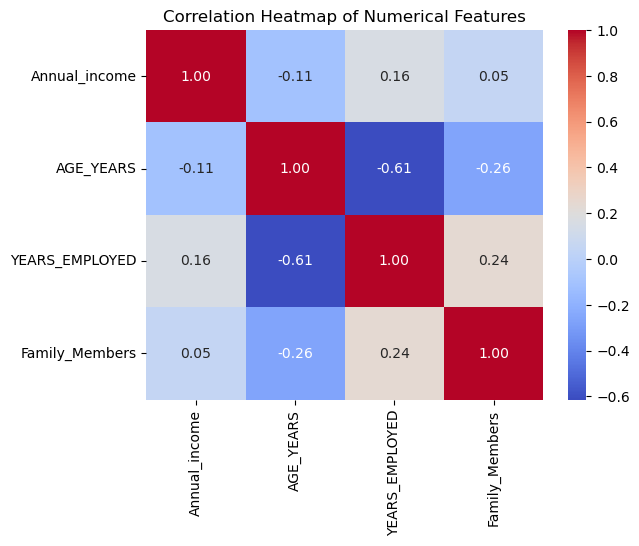

In [318]:
# Correlation heatmap
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [257]:
df.drop(columns=["Mobile_phone"],inplace=True)

In [258]:
columns_to_scale = ['CHILDREN','Annual_income', 'AGE_YEARS','YEARS_EMPLOYED', 'Family_Members']

In [259]:
st=StandardScaler()
df[columns_to_scale] = st.fit_transform(df[columns_to_scale]) 

In [260]:

columns_to_encode = ['GENDER', 'Car_Owner', 'EDUCATION', 'Propert_Owner', 'Type_Income', 'Marital_status', 'Housing_type', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation']

df = pd.get_dummies(df, columns=columns_to_encode, dtype='int')


In [261]:
df.columns

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'Birthday_count',
       'Employed_days', 'Family_Members', 'AGE_YEARS', 'YEARS_EMPLOYED',
       'GENDER_F', 'GENDER_M', 'Car_Owner_N', 'Car_Owner_Y',
       'EDUCATION_Academic degree', 'EDUCATION_Higher education',
       'EDUCATION_Incomplete higher', 'EDUCATION_Lower secondary',
       'EDUCATION_Secondary / secondary special', 'Propert_Owner_N',
       'Propert_Owner_Y', 'Type_Income_Commercial associate',
       'Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working', 'Marital_status_Civil marriage',
       'Marital_status_Married', 'Marital_status_Separated',
       'Marital_status_Single / not married', 'Marital_status_Widow',
       'Housing_type_Co-op apartment', 'Housing_type_House / apartment',
       'Housing_type_Municipal apartment', 'Housing_type_Office apartment',
       'Housing_type_Rented apartment', 'Housing_type_With parents',
       'Work_Phone_0', 'Work_Phone_1', 'Phone_0', 'Phone_1', 'EMA

In [264]:
df.head()

Ind_ID  CHILDREN  Annual_income  Birthday_count  Employed_days  \
0  5008827 -0.531623      -0.093065        -18772.0              0   
1  5009744 -0.531623       1.111045        -13557.0           -586   
2  5009746 -0.531623       1.111045        -15661.5           -586   
3  5009749 -0.531623      -0.213476        -13557.0           -586   
4  5009752 -0.531623       1.111045        -13557.0           -586   

   Family_Members  AGE_YEARS  YEARS_EMPLOYED  GENDER_F  GENDER_M  ...  \
0       -0.171098   0.614433       -0.920752         0         1  ...   
1       -0.171098  -0.602586       -0.617605         1         0  ...   
2       -0.171098  -0.081007       -0.617605         1         0  ...   
3       -0.171098  -0.602586       -0.617605         1         0  ...   
4       -0.171098  -0.602586       -0.617605         1         0  ...   

   Type_Occupation_Low-skill Laborers  Type_Occupation_Managers  \
0                                   0                         0   
1                                   0                         0   
2                                   0                         0   
3                                   0                         0   
4                                   0                         0   

   Type_Occupation_Medicine staff  Type_Occupation_Private service staff  \
0                               0                                      0   
1                               0                                      0   
2                               0                                      0   
3                               0                                      0   
4                               0                                      0   

   Type_Occupation_Realty agents  Type_Occupation_Sales staff  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   Type_Occupation_Secretaries  Type_Occupation_Security staff  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   

   Type_Occupation_Waiters/barmen staff  Type_Occupation_not_specified  
0                                     0                              1  
1                                     0                              1  
2                                     0                              1  
3                                     0                              1  
4                                     0                              1  

[5 rows x 59 columns]

In [48]:
df1 = pd.read_csv(r"C:\Users\thaku\Desktop\odin\Cradit card Project\Capstone+Project+1\Credit_card_label.csv")

In [49]:
df1.head()

Ind_ID  label
0  5008827      1
1  5009744      1
2  5009746      1
3  5009749      1
4  5009752      1

In [50]:
new_df=pd.merge(df, df1, how='inner', on=['Ind_ID'])

In [51]:
new_df

Ind_ID  CHILDREN  Annual_income  Birthday_count  Employed_days  \
0     5008827 -0.531623      -0.093065        -18772.0              0   
1     5009744 -0.531623       1.111045        -13557.0           -586   
2     5009746 -0.531623       1.111045        -15661.5           -586   
3     5009749 -0.531623      -0.213476        -13557.0           -586   
4     5009752 -0.531623       1.111045        -13557.0           -586   
...       ...       ...            ...             ...            ...   
1536  5028645 -0.531623      -0.213476        -11957.0          -2182   
1537  5023655 -0.531623       0.308305        -10229.0          -1209   
1538  5115992  2.040530      -0.093065        -13174.0          -2477   
1539  5118219 -0.531623       0.709675        -15292.0           -645   
1540  5053790 -0.531623       0.308305        -16601.0          -2859   

      Family_Members  AGE_YEARS  YEARS_EMPLOYED  GENDER_F  GENDER_M  ...  \
0          -0.171098   0.614433       -2.219386         0         1  ...   
1          -0.171098  -0.602586        0.436393         1         0  ...   
2          -0.171098  -0.081007        0.436393         1         0  ...   
3          -0.171098  -0.602586        0.436393         1         0  ...   
4          -0.171098  -0.602586        0.436393         1         0  ...   
...              ...        ...             ...       ...       ...  ...   
1536       -0.171098  -0.950306        0.446995         1         0  ...   
1537       -1.225745  -1.384956        0.439044         1         0  ...   
1538        1.938196  -0.689516        0.449646         0         1  ...   
1539       -0.171098  -0.167937        0.436393         0         1  ...   
1540       -0.171098   0.092853        0.452296         1         0  ...   

      Type_Occupation_Managers  Type_Occupation_Medicine staff  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   
...                        ...                             ...   
1536                         1                               0   
1537                         0                               0   
1538                         1                               0   
1539                         0                               0   
1540                         0                               0   

      Type_Occupation_Private service staff  Type_Occupation_Realty agents  \
0                                         0                              0   
1                                         0                              0   
2                                         0                              0   
3                                         0                              0   
4                                         0                              0   
...                                     ...                            ...   
1536                                      0                              0   
1537                                      0                              0   
1538                                      0                              0   
1539                                      0                              0   
1540                                      0                              0   

      Type_Occupation_Sales staff  Type_Occupation_Secretaries  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   
...                           ...                          ...   
1536                     

In [52]:
new_df.columns

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'Birthday_count',
       'Employed_days', 'Family_Members', 'AGE_YEARS', 'YEARS_EMPLOYED',
       'GENDER_F', 'GENDER_M', 'Car_Owner_N', 'Car_Owner_Y',
       'EDUCATION_Academic degree', 'EDUCATION_Higher education',
       'EDUCATION_Incomplete higher', 'EDUCATION_Lower secondary',
       'EDUCATION_Secondary / secondary special', 'Propert_Owner_N',
       'Propert_Owner_Y', 'Type_Income_Commercial associate',
       'Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working', 'Marital_status_Civil marriage',
       'Marital_status_Married', 'Marital_status_Separated',
       'Marital_status_Single / not married', 'Marital_status_Widow',
       'Housing_type_Co-op apartment', 'Housing_type_House / apartment',
       'Housing_type_Municipal apartment', 'Housing_type_Office apartment',
       'Housing_type_Rented apartment', 'Housing_type_With parents',
       'Work_Phone_0', 'Work_Phone_1', 'Phone_0', 'Phone_1', 'EMA

In [138]:
new_df.drop(columns=["Ind_ID"],inplace=True)

# LogisticRegression

In [139]:
# Importing requared libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings

In [140]:
# Assuming 'label' is the target variable
target_variable = 'label'

In [141]:
# Extract features (X) and target variable (y)
X = new_df.drop(target_variable, axis=1)
y = new_df[target_variable]

In [142]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [143]:
# Initialize Logistic Regression model
logreg_model = LogisticRegression()

In [144]:
# Fit the model on the training data
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [145]:
# Predict on the test data
y_pred = logreg_model.predict(X_test)

In [146]:
# Evaluate the model

warnings.filterwarnings("ignore")

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# To reset warnings to their default behavior (showing warnings)
warnings.filterwarnings("default")


In [147]:
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       276
           1       0.00      0.00      0.00        33

    accuracy                           0.89       309
   macro avg       0.45      0.50      0.47       309
weighted avg       0.80      0.89      0.84       309



# Decision Tree

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [149]:
# Assuming 'label' is the target variable
target_variable = 'label'


In [150]:

# Extract features (X) and target variable (y)
X = new_df.drop(target_variable, axis=1)
y = new_df[target_variable]

In [151]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [152]:
# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)


In [153]:

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [154]:
# Predict on the test data
y_pred = decision_tree_model.predict(X_test)


In [155]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [156]:
# Print the results
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)


Decision Tree Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       276
           1       0.35      0.36      0.36        33

    accuracy                           0.86       309
   macro avg       0.64      0.64      0.64       309
weighted avg       0.86      0.86      0.86       309



In [157]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [158]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[254  22]
 [ 21  12]]


# Random Forest

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [160]:
# Assuming 'label' is the target variable
target_variable = 'label'

In [161]:
# Extract features (X) and target variable (y)
X = new_df.drop(target_variable, axis=1)
y = new_df[target_variable]

In [162]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
# Initialize Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

In [164]:
# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [165]:
# Predict on the test data
y_pred = random_forest_model.predict(X_test)

In [166]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [167]:
# Print the results
print(f"Random Forest Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Random Forest Accuracy: 0.94
Confusion Matrix:
[[278   2]
 [ 18  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       280
           1       0.85      0.38      0.52        29

    accuracy                           0.94       309
   macro avg       0.89      0.69      0.74       309
weighted avg       0.93      0.94      0.92       309



# Gradient Boosting

In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [169]:
# Assuming 'label' is the target variable
target_variable = 'label'

In [170]:
# Extract features (X) and target variable (y)
X = new_df.drop(target_variable, axis=1)
y = new_df[target_variable]

In [171]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
# Initialize Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

In [173]:
# Fit the model on the training data
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [174]:
# Predict on the test data
y_pred = gradient_boosting_model.predict(X_test)

In [175]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [176]:
# Print the results
print(f"Gradient Boosting Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Gradient Boosting Accuracy: 0.92
Confusion Matrix:
[[279   1]
 [ 23   6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       280
           1       0.86      0.21      0.33        29

    accuracy                           0.92       309
   macro avg       0.89      0.60      0.65       309
weighted avg       0.92      0.92      0.90       309



In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [178]:
# Assuming 'label' is the target variable
target_variable = 'label'

In [179]:
# Extract features (X) and target variable (y)
X = new_df.drop(target_variable, axis=1)
y = new_df[target_variable]

In [180]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
# Initialize AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

In [182]:
# Fit the model on the training data
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [183]:
# Predict on the test data
y_pred = adaboost_model.predict(X_test)

In [184]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [185]:
# Print the results
print(f"AdaBoost Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

AdaBoost Accuracy: 0.90
Confusion Matrix:
[[277   3]
 [ 27   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       280
           1       0.40      0.07      0.12        29

    accuracy                           0.90       309
   macro avg       0.66      0.53      0.53       309
weighted avg       0.86      0.90      0.87       309



In [186]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


C:\Users\thaku\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\thaku\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\thaku\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [187]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [188]:
# Assuming 'label' is the target variable
target_variable = 'label'


In [189]:
# Extract features (X) and target variable (y)
X = new_df.drop(target_variable, axis=1)
y = new_df[target_variable]


In [190]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [191]:

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42)


In [192]:
# Fit the model on the training data
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [193]:
# Predict on the test data
y_pred = xgb_model.predict(X_test)


In [194]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


In [195]:
# Print the results
print(f"XGBoost Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


XGBoost Accuracy: 0.93
Confusion Matrix:
[[277   3]
 [ 18  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       280
           1       0.79      0.38      0.51        29

    accuracy                           0.93       309
   macro avg       0.86      0.68      0.74       309
weighted avg       0.92      0.93      0.92       309



# Hyperparameter Tuning

In [196]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Assuming X_train, y_train are your training data
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}


In [197]:

xgb_model = XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters on the full training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Test the best model on the holdout set
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Holdout Set:", accuracy)


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
Accuracy on Holdout Set: 0.9288025889967637


# Feature Importance Analysis

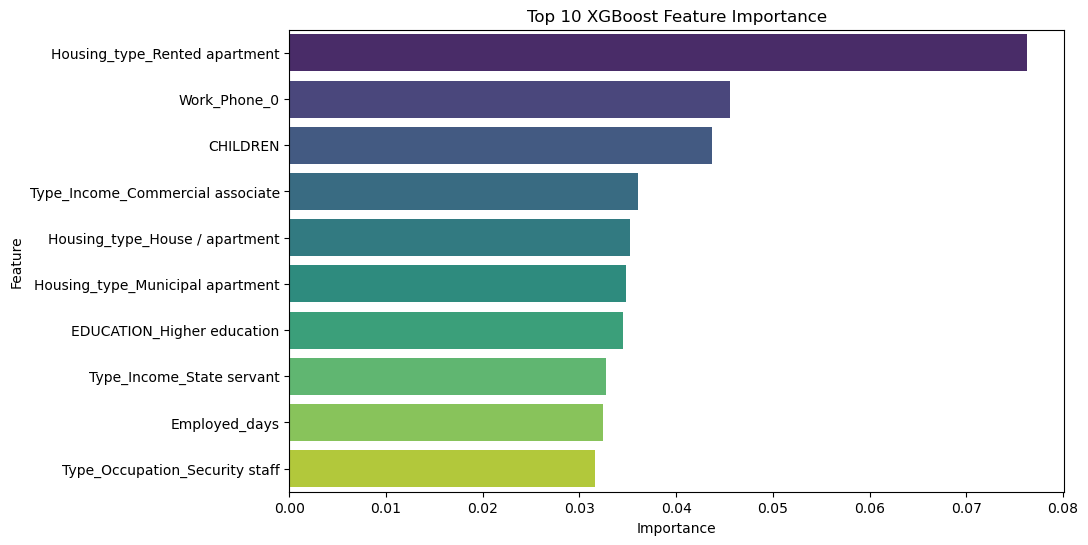

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = best_model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features = feature_importance_df.head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 XGBoost Feature Importance')
plt.show()



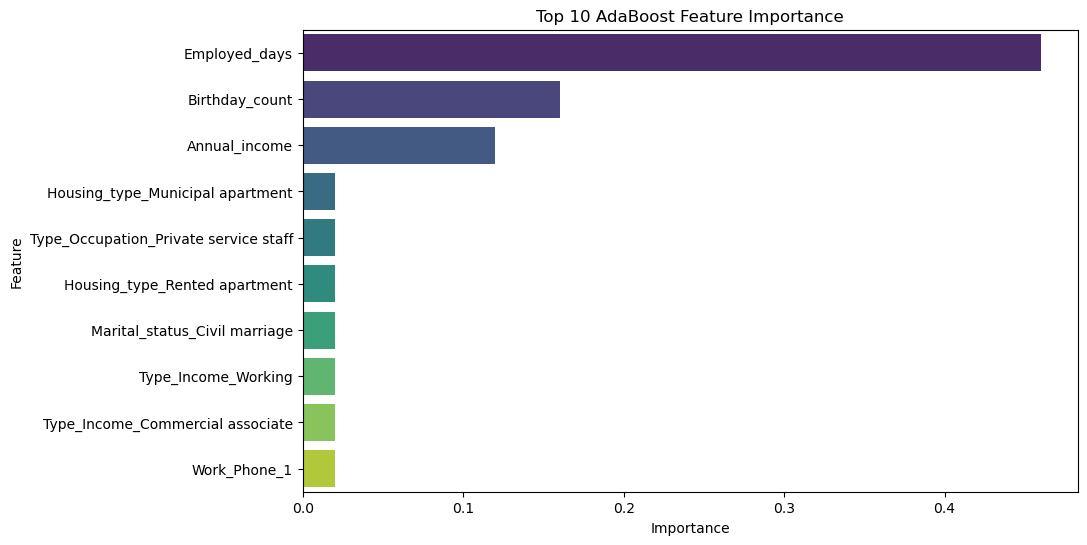

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = adaboost_model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df_adaboost = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df_adaboost = feature_importance_df_adaboost.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features_adaboost = feature_importance_df_adaboost.head(10)

# Plot the top 10 feature importances for AdaBoost
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features_adaboost, palette='viridis')
plt.title('Top 10 AdaBoost Feature Importance')
plt.show()



In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Explore relationships between categorical features and target variable
for feature in categorical_features:
    sns.countplot(x=feature, hue='Label', data=df)
    plt.title(f'Relationship between {feature} and Approval Status')
    plt.show()


ValueError: Could not interpret input 'GENDER'

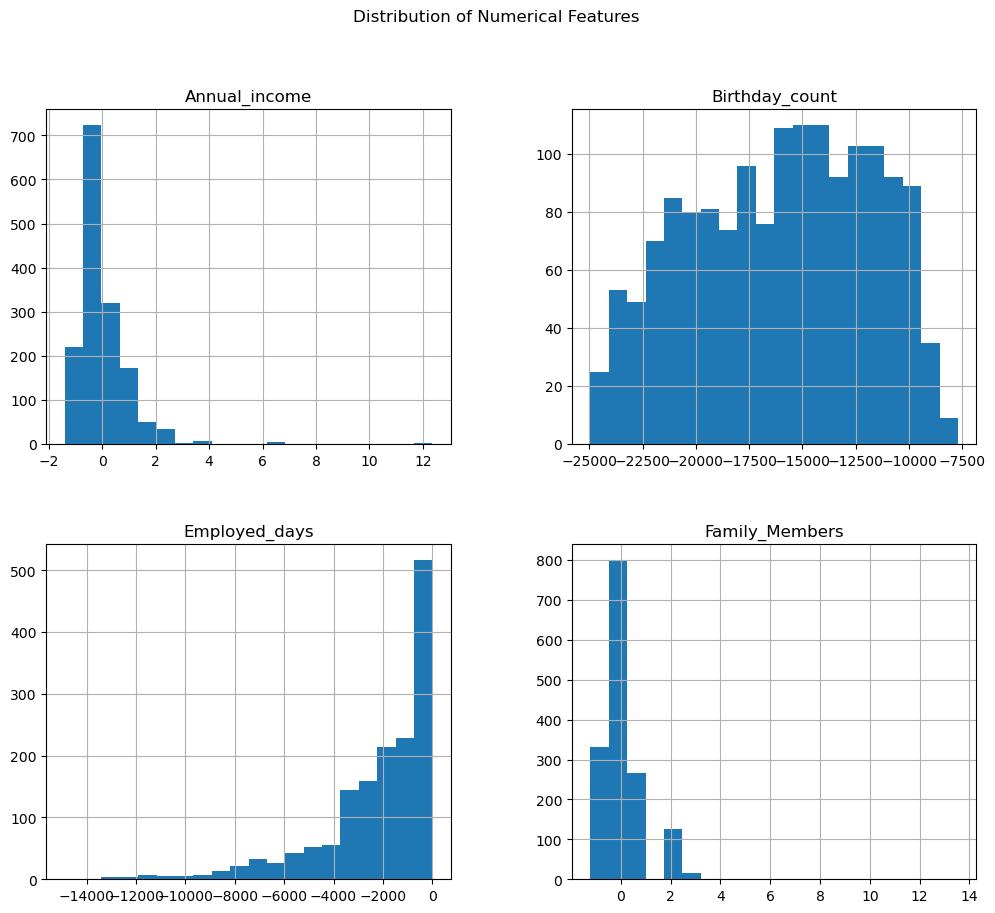

In [205]:

# Distribution of numerical features
df_numerical = df[['Annual_income', 'Birthday_count', 'Employed_days', 'Family_Members']]
df_numerical.hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

C:\Users\thaku\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


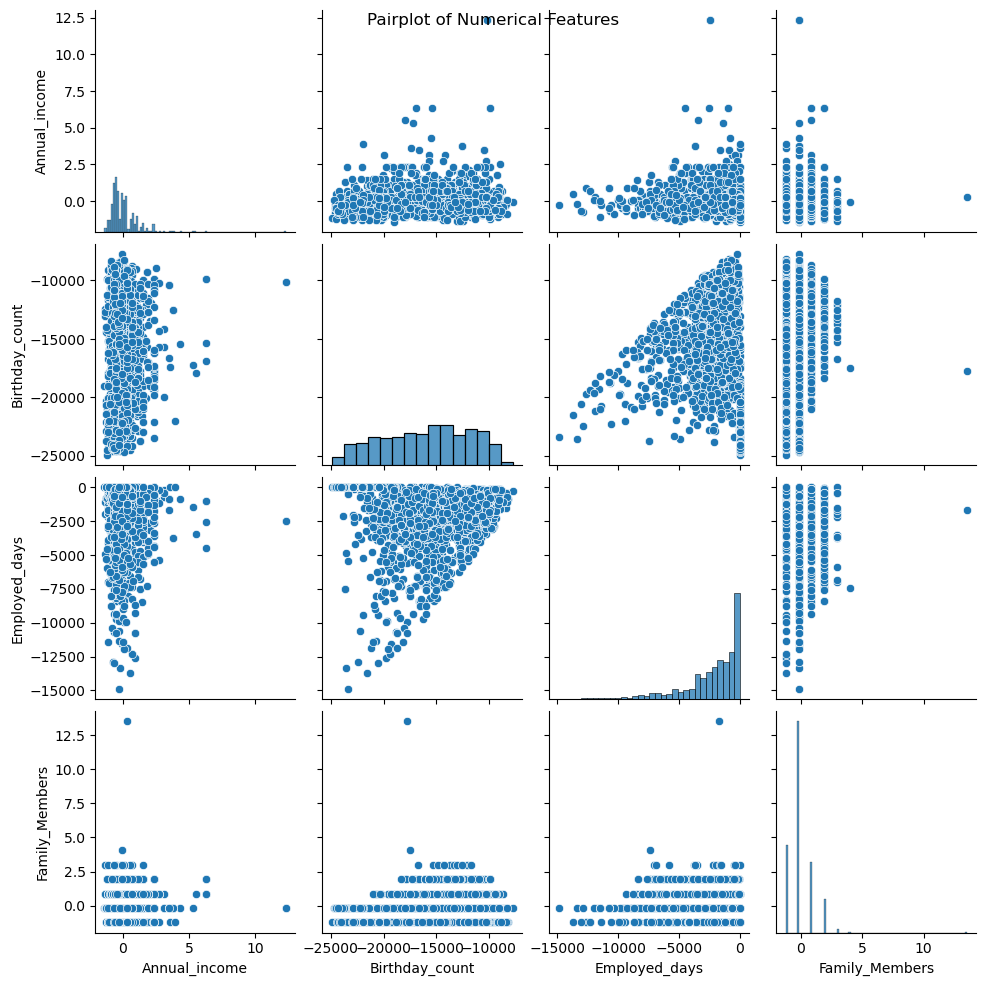

In [207]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df_numerical)
plt.suptitle('Pairplot of Numerical Features')
plt.show()


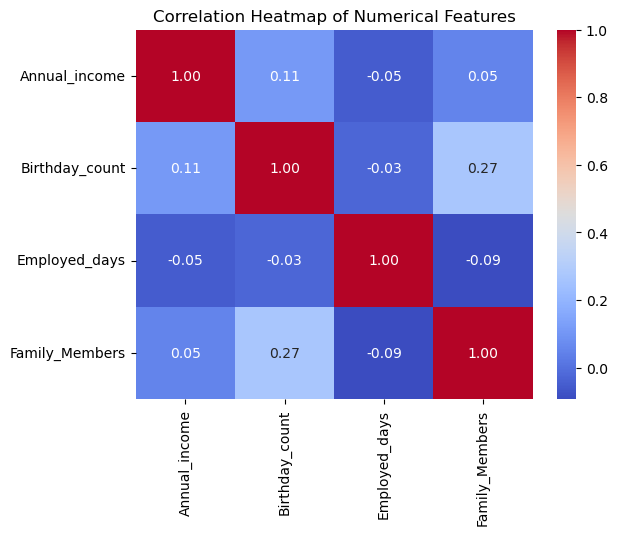

In [208]:
# Correlation heatmap
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [1]:
# Distribution of categorical features
# categorical_features = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'Education', 'Marital_status', 'Housing_type', 'Type_Occupation']
# for feature in categorical_features:
#     sns.countplot(x=feature, data=df)
#     plt.title(f'Distribution of {feature}')
#     plt.show()


In [212]:
df

Ind_ID  CHILDREN  Annual_income  Birthday_count  Employed_days  \
0     5008827 -0.531623      -0.093065        -18772.0              0   
1     5009744 -0.531623       1.111045        -13557.0           -586   
2     5009746 -0.531623       1.111045        -15661.5           -586   
3     5009749 -0.531623      -0.213476        -13557.0           -586   
4     5009752 -0.531623       1.111045        -13557.0           -586   
...       ...       ...            ...             ...            ...   
1543  5028645 -0.531623      -0.213476        -11957.0          -2182   
1544  5023655 -0.531623       0.308305        -10229.0          -1209   
1545  5115992  2.040530      -0.093065        -13174.0          -2477   
1546  5118219 -0.531623       0.709675        -15292.0           -645   
1547  5053790 -0.531623       0.308305        -16601.0          -2859   

      Family_Members  AGE_YEARS  YEARS_EMPLOYED  GENDER_F  GENDER_M  ...  \
0          -0.171098   0.614433       -2.219386         0         1  ...   
1          -0.171098  -0.602586        0.436393         1         0  ...   
2          -0.171098  -0.081007        0.436393         1         0  ...   
3          -0.171098  -0.602586        0.436393         1         0  ...   
4          -0.171098  -0.602586        0.436393         1         0  ...   
...              ...        ...             ...       ...       ...  ...   
1543       -0.171098  -0.950306        0.446995         1         0  ...   
1544       -1.225745  -1.384956        0.439044         1         0  ...   
1545        1.938196  -0.689516        0.449646         0         1  ...   
1546       -0.171098  -0.167937        0.436393         0         1  ...   
1547       -0.171098   0.092853        0.452296         1         0  ...   

      Type_Occupation_Low-skill Laborers  Type_Occupation_Managers  \
0                                      0                         0   
1                                      0                         0   
2                                      0                         0   
3                                      0                         0   
4                                      0                         0   
...                                  ...                       ...   
1543                                   0                         1   
1544                                   0                         0   
1545                                   0                         1   
1546                                   0                         0   
1547                                   0                         0   

      Type_Occupation_Medicine staff  Type_Occupation_Private service staff  \
0                                  0                                      0   
1                                  0                                      0   
2                                  0                                      0   
3                                  0                                      0   
4                                  0                                      0   
...                              ...                                    ...   
1543                               0                                      0   
1544                               0                                      0   
1545                               0                                      0   
1546                               0                                      0   
1547                               0                                      0   

      Type_Occupation_Realty agents  Type_Occupation_Sales staff  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   
...                

In [213]:
new_df

CHILDREN  Annual_income  Birthday_count  Employed_days  Family_Members  \
0    -0.531623      -0.093065        -18772.0              0       -0.171098   
1    -0.531623       1.111045        -13557.0           -586       -0.171098   
2    -0.531623       1.111045        -15661.5           -586       -0.171098   
3    -0.531623      -0.213476        -13557.0           -586       -0.171098   
4    -0.531623       1.111045        -13557.0           -586       -0.171098   
...        ...            ...             ...            ...             ...   
1536 -0.531623      -0.213476        -11957.0          -2182       -0.171098   
1537 -0.531623       0.308305        -10229.0          -1209       -1.225745   
1538  2.040530      -0.093065        -13174.0          -2477        1.938196   
1539 -0.531623       0.709675        -15292.0           -645       -0.171098   
1540 -0.531623       0.308305        -16601.0          -2859       -0.171098   

      AGE_YEARS  YEARS_EMPLOYED  GENDER_F  GENDER_M  Car_Owner_N  ...  \
0      0.614433       -2.219386         0         1            0  ...   
1     -0.602586        0.436393         1         0            0  ...   
2     -0.081007        0.436393         1         0            0  ...   
3     -0.602586        0.436393         1         0            0  ...   
4     -0.602586        0.436393         1         0            0  ...   
...         ...             ...       ...       ...          ...  ...   
1536  -0.950306        0.446995         1         0            1  ...   
1537  -1.384956        0.439044         1         0            1  ...   
1538  -0.689516        0.449646         0         1            0  ...   
1539  -0.167937        0.436393         0         1            0  ...   
1540   0.092853        0.452296         1         0            0  ...   

      Type_Occupation_Managers  Type_Occupation_Medicine staff  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   
...                        ...                             ...   
1536                         1                               0   
1537                         0                               0   
1538                         1                               0   
1539                         0                               0   
1540                         0                               0   

      Type_Occupation_Private service staff  Type_Occupation_Realty agents  \
0                                         0                              0   
1                                         0                              0   
2                                         0                              0   
3                                         0                              0   
4                                         0                              0   
...                                     ...                            ...   
1536                                      0                              0   
1537                                      0                              0   
1538                                      0                              0   
1539                                      0                              0   
1540                                      0                              0   

      Type_Occupation_Sales staff  Type_Occupation_Secretaries  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   
...                           ...         